In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [34]:
dataset = pd.read_csv('Dataset/final_data_v1.csv', parse_dates=['datetime'])

In [35]:
dataset.head()

,datetime,date,time,temp,weather,wind,wind_direction,humidity,pressure,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 00:00:00,1/1/2021,0:00,24.0,Passing clouds.,13.0,30.0,61.0,1012.0,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,2021-01-01 01:00:00,1/1/2021,1:00,24.0,Passing clouds.,11.0,40.0,61.0,1011.0,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,2021-01-01 02:00:00,1/1/2021,2:00,23.0,Passing clouds.,9.0,20.0,65.0,1011.0,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,2021-01-01 03:00:00,1/1/2021,3:00,23.0,Passing clouds.,7.0,10.0,65.0,1011.0,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,2021-01-01 04:00:00,1/1/2021,4:00,23.0,Passing clouds.,13.0,50.0,65.0,1011.0,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21


In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36624 entries, 0 to 36623
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        36624 non-null  datetime64[ns]
 1   date            36624 non-null  object        
 2   time            36624 non-null  object        
 3   temp            33927 non-null  float64       
 4   weather         33927 non-null  object        
 5   wind            33927 non-null  float64       
 6   wind_direction  33927 non-null  float64       
 7   humidity        33919 non-null  float64       
 8   pressure        33860 non-null  float64       
 9   aqi             36624 non-null  int64         
 10  co              36624 non-null  float64       
 11  no              36624 non-null  float64       
 12  no2             36624 non-null  float64       
 13  o3              36624 non-null  float64       
 14  so2             36624 non-null  float64       
 15  pm

| Tên Cột            | Kiểu Dữ Liệu | Giải thích ý nghĩa |
|---------------------|--------------|--------------------|
| `datetime`          | datetime       | Thời gian đầy đủ (ngày + giờ) |
| `date`              | date       | Ngày quan sát |
| `time`              | time       | Giờ quan sát |
| `temp`              | numerical      | Nhiệt độ (°C) |
| `weather`           | categorical       | Tình trạng thời tiết  |
| `wind`              | numerical      | Tốc độ gió km/h hoặc |
| `wind_direction`    | numerical      | Hướng gió (từ 0°–360°) |
| `humidity`          | numerical      | Độ ẩm tương đối (%) |
| `pressure`          | numerical      | Áp suất khí quyển (mbar) |
| `aqi`               | numerical        | Chất lượng không khí (Air Quality Index) |
| `co`                | numerical      | Nồng độ khí CO μg/m3 |
| `no`                | numerical      | Nồng độ NO μg/m3 |
| `no2`               | numerical      | Nồng độ NO₂μg/m3 |
| `o3`                | numerical      | Nồng độ O₃ μg/m3 |
| `so2`               | numerical      | Nồng độ SO₂ μg/m3|
| `pm2_5`             | numerical      | Nồng độ bụi mịn PM2.5 μg/m3|
| `pm10`              | numerical      | Nồng độ bụi mịn PM10 μg/m3|
| `nh3`               | numerical      | Nồng độ NH₃  μg/m3 |

In [1]:
print(dataset.describe())


NameError: name 'dataset' is not defined

In [38]:
print(dataset.duplicated().sum())

0


Text(0.5, 1.0, 'Missing Values Heatmap')

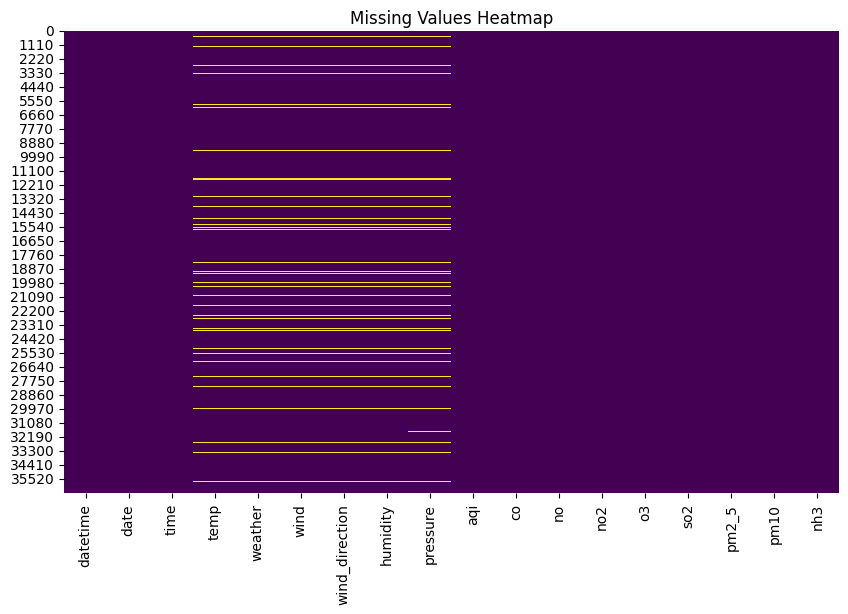

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")

In [40]:
dataset[(dataset == -9999).any(axis=1)]


,datetime,date,time,temp,weather,wind,wind_direction,humidity,pressure,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
22183,2023-07-26 07:00:00,7/26/2023,7:00,NaN,NaN,NaN,NaN,NaN,NaN,1,397.21,0.87,13.02,-9999.00,12.87,7.51,9.12,3.83
26807,2024-02-07 23:00:00,2/7/2024,23:00,27.0,Passing clouds.,11.0,130.0,84.0,1012.0,2,534.06,1.93,36.33,6.26,36.72,17.09,-9999.00,5.70
31035,2024-08-05 03:00:00,8/5/2024,3:00,25.0,Passing clouds.,6.0,260.0,94.0,1009.0,5,1148.22,17.66,-9999.00,49.35,52.93,50.38,59.98,11.27
31176,2024-08-11 00:00:00,8/11/2024,0:00,29.0,Passing clouds.,13.0,240.0,84.0,1007.0,4,1255.04,23.69,-9999.00,1.79,29.09,49.56,63.03,11.15


In [41]:
# Dung ffill 
dataset.replace(-9999, float('nan'), inplace=True)
dataset.fillna(method='ffill', inplace=True)
dataset.isnull().sum()

/tmp/ipykernel_478638/1464069072.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


datetime          0
date              0
time              0
temp              0
weather           0
wind              0
wind_direction    0
humidity          0
pressure          0
aqi               0
co                0
no                0
no2               0
o3                0
so2               0
pm2_5             0
pm10              0
nh3               0
dtype: int64

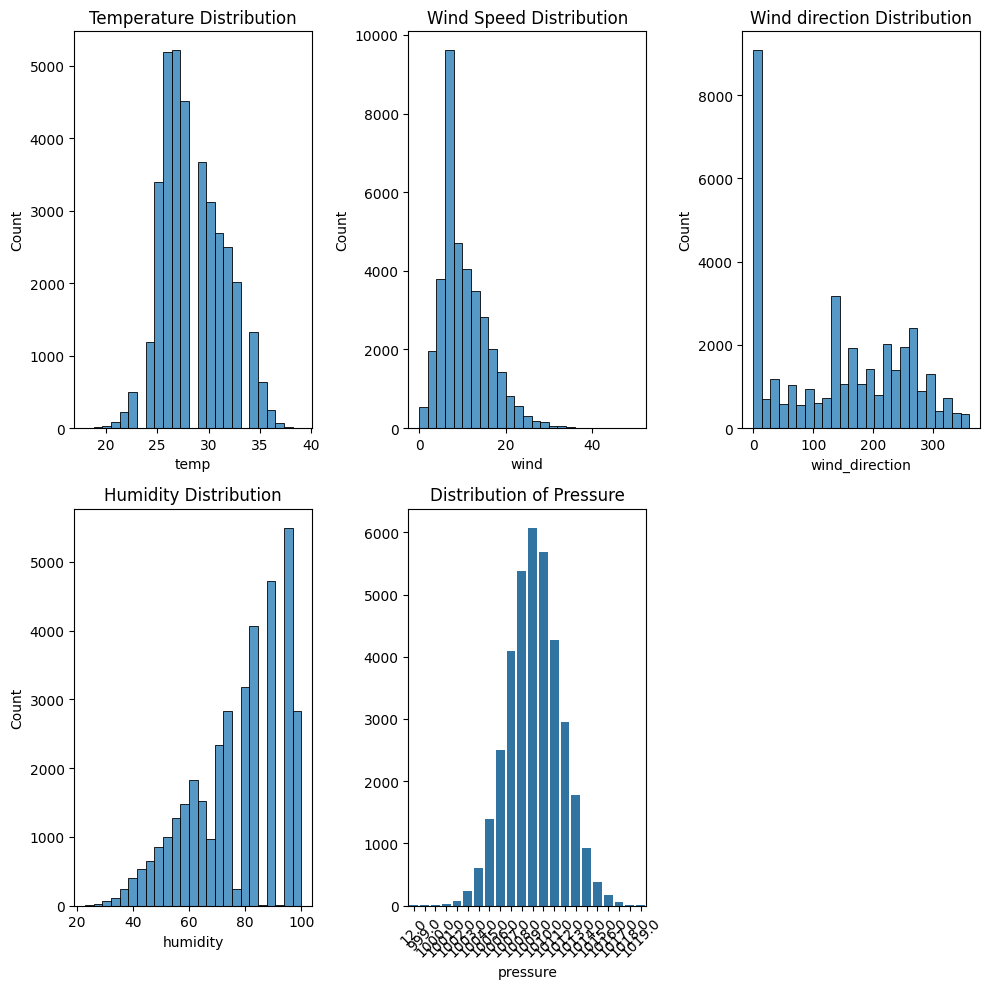

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
sns.histplot(dataset['temp'], bins=25)
plt.title("Temperature Distribution")

plt.subplot(2, 3, 2)
sns.histplot(dataset['wind'], bins=25)
plt.title("Wind Speed Distribution")

plt.subplot(2, 3, 3)
sns.histplot(dataset['wind_direction'], bins=25)
plt.title("Wind direction Distribution")

plt.subplot(2, 3, 4)
sns.histplot(dataset['humidity'], bins=25)
plt.title("Humidity Distribution")

plt.subplot(2, 3, 5)
pressure_counts = dataset['pressure'].value_counts().sort_index()
sns.barplot(x=pressure_counts.index, y=pressure_counts.values)
plt.title('Distribution of Pressure')
plt.xticks(rotation=45)


plt.tight_layout()

Hướng gió có vẻ như bị lỗi nhiều nên sẽ không có nhiều giá trị trực quan.

In [ ]:
cols = ['co', 'no2', 'o3', 'so2', 'pm10', 'pm2_5', 'nh3']
plt.figure(figsize=(10, 10))
for col in cols:
    plt.subplot(3, 3, cols.index(col) + 1)
    sns.histplot(dataset[col], bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

2 cột categorical 


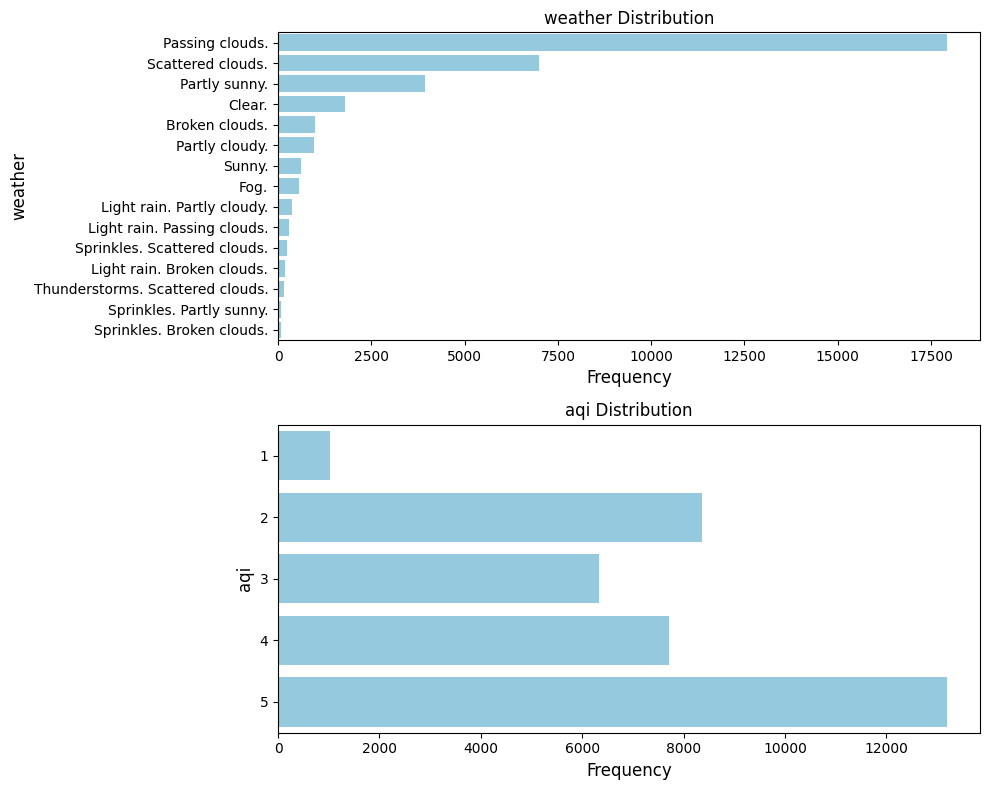

In [ ]:
cols = ['weather', 'aqi']

plt.figure(figsize=(10, 8))
for col in cols:
    count = dataset[col].value_counts()[:15]  # Get top 10 most frequent values
    plt.subplot(2, 1, cols.index(col) + 1)  # Create subplots
    sns.barplot(x=count.values, y=count.index, orient='h', color='skyblue')  # Horizontal bar plot
    plt.title(f"{col} Distribution")
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
cols = ['aqi', 'co', 'no2', 'o3', 'so2', 'pm10', 'pm2_5', 'nh3', 'temp', 'humidity', 'pressure', 'wind', 'wind_direction']

corr_matrix = dataset[cols].corr()
target_feature = 'aqi'
correlations = corr_matrix[target_feature].abs().sort_values(ascending = False)
print(f"Correlation score:")
print(correlations[1:])

Correlation score:
pm10              0.613918
pm2_5             0.600069
co                0.573488
so2               0.556137
no2               0.483460
nh3               0.475341
wind              0.269075
wind_direction    0.107287
temp              0.081518
o3                0.047543
pressure          0.037235
humidity          0.013486
Name: aqi, dtype: float64


---

Trong dữ liệu này thời tiết chủ yếu chỉ xoay quanh nhiệt độ, gió, độ ẩm, áp suất

/tmp/ipykernel_478638/2508722673.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()


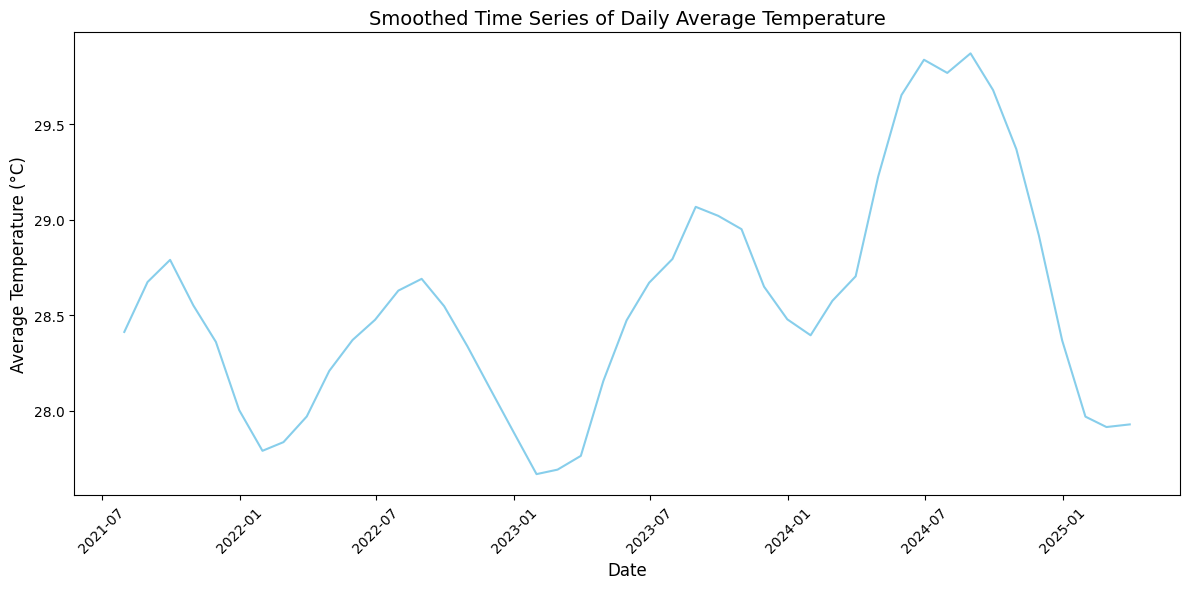

In [ ]:
# Đặt tần suất xuống 1 ngày và tính trung bình nhiệt độ mỗi ngày
temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()

# Áp dụng trung bình động với cửa sổ 7 ngày để làm mượt dữ liệu
temperature_smoothed = temperature_daily.rolling(window=7).mean()

# Vẽ biểu đồ với dữ liệu đã làm mượt
plt.figure(figsize=(12, 6))
plt.plot(temperature_smoothed, color='skyblue')
plt.title('Smoothed Time Series of Daily Average Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/3945273558.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()


<Figure size 1000x600 with 0 Axes>

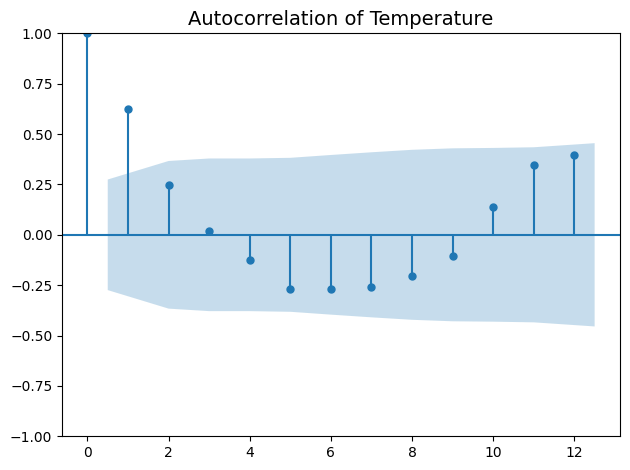

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()
# Vẽ đồ thị ACF để kiểm tra tự tương quan của nhiệt độ theo thời gian
plt.figure(figsize=(10, 6))
plot_acf(temperature_daily.dropna(), lags=12)  # Kiểm tra tự tương quan tới 365 ngày
plt.title('Autocorrelation of Temperature', fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/2729085571.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()


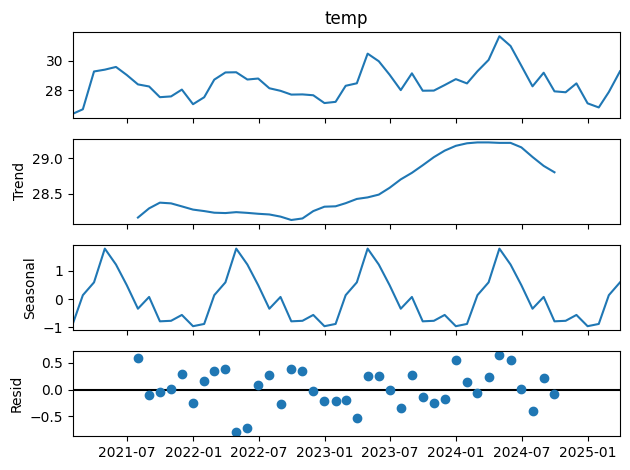

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Tạo một series thời gian theo ngày để phân tích
# temperature_daily = dataset.groupby('date')['temp'].max()
# temperature_daily = dataset.groupby('date')['temp'].min()
temperature_daily = dataset.resample('M', on='datetime')['temp'].mean()


# Decompose dữ liệu thành các yếu tố: trend, seasonal, residual
decomposition = seasonal_decompose(temperature_daily, model='additive', period=12)  # Period = 365 cho năm
decomposition.plot()
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/107398423.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


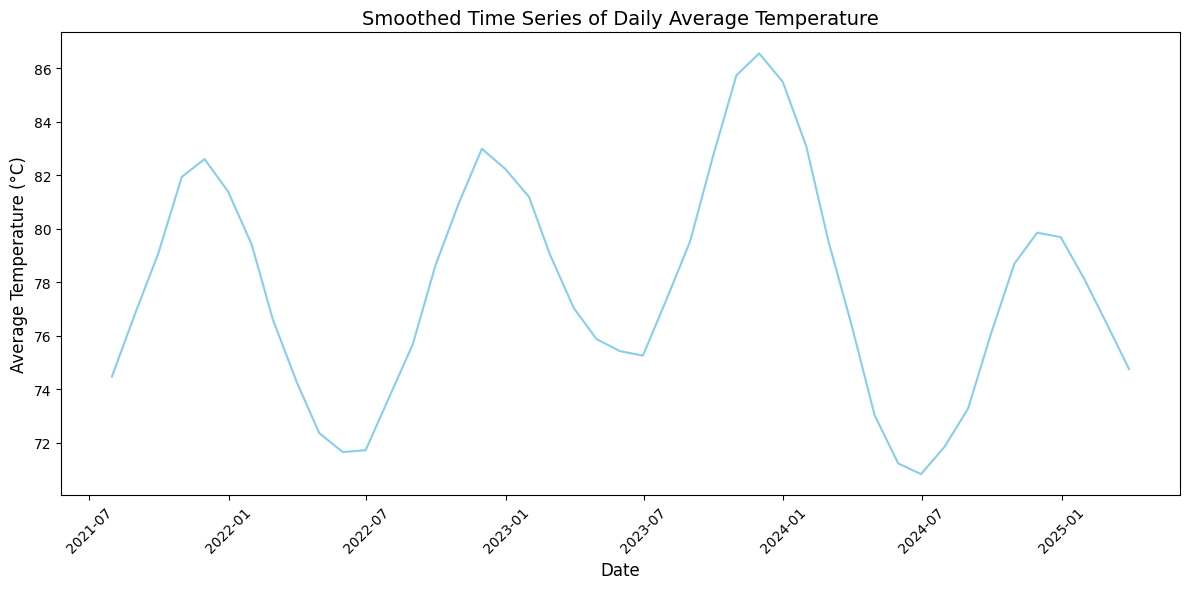

In [ ]:
# Đặt tần suất xuống 1 ngày và tính trung bình nhiệt độ mỗi ngày
temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()

# Áp dụng trung bình động với cửa sổ 7 ngày để làm mượt dữ liệu
temperature_smoothed = temperature_daily.rolling(window=7).mean()

# Vẽ biểu đồ với dữ liệu đã làm mượt
plt.figure(figsize=(12, 6))
plt.plot(temperature_smoothed, color='skyblue')
plt.title('Smoothed Time Series of Daily Average Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/1146301649.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


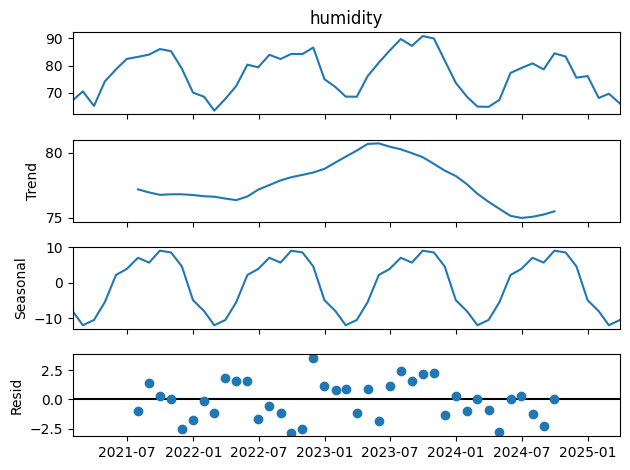

In [ ]:

# Tạo một series thời gian theo ngày để phân tích
# temperature_daily = dataset.groupby('date')['temp'].max()
# temperature_daily = dataset.groupby('date')['temp'].min()
temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


# Decompose dữ liệu thành các yếu tố: trend, seasonal, residual
decomposition = seasonal_decompose(temperature_daily, model='additive', period=12)  # Period = 365 cho năm
decomposition.plot()
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/215910861.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['wind'].mean()


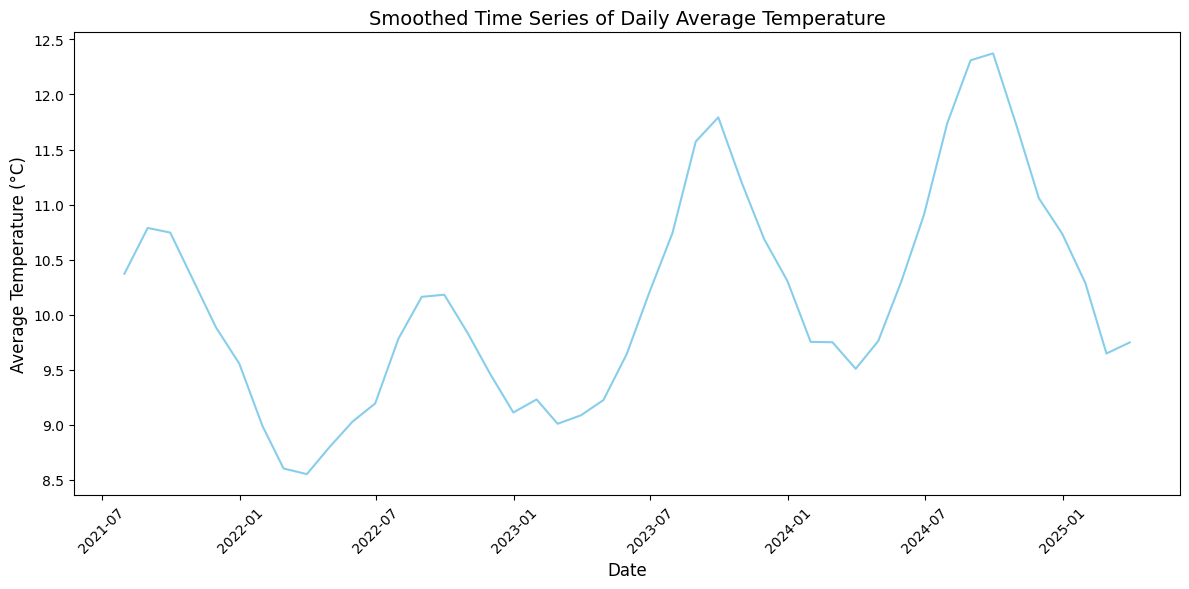

In [ ]:
# Đặt tần suất xuống 1 ngày và tính trung bình nhiệt độ mỗi ngày
temperature_daily = dataset.resample('M', on='datetime')['wind'].mean()

# Áp dụng trung bình động với cửa sổ 7 ngày để làm mượt dữ liệu
temperature_smoothed = temperature_daily.rolling(window=7).mean()

# Vẽ biểu đồ với dữ liệu đã làm mượt
plt.figure(figsize=(12, 6))
plt.plot(temperature_smoothed, color='skyblue')
plt.title('Smoothed Time Series of Daily Average Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/610274781.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['wind'].mean()


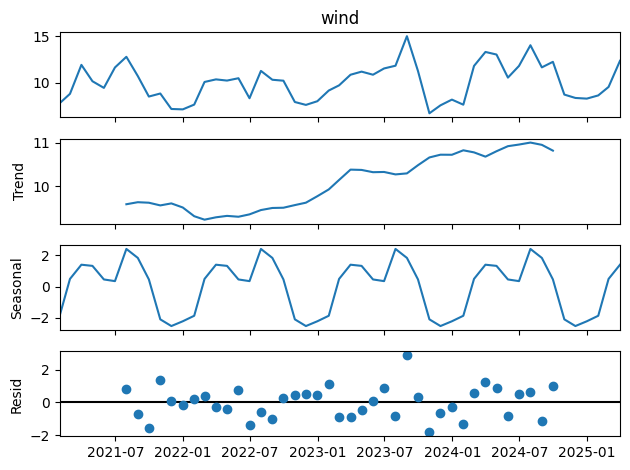

In [ ]:

# Tạo một series thời gian theo ngày để phân tích
# temperature_daily = dataset.groupby('date')['temp'].max()
# temperature_daily = dataset.groupby('date')['temp'].min()
temperature_daily = dataset.resample('M', on='datetime')['wind'].mean()


# Decompose dữ liệu thành các yếu tố: trend, seasonal, residual
decomposition = seasonal_decompose(temperature_daily, model='additive', period=12)  # Period = 365 cho năm
decomposition.plot()
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/3908562309.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['pressure'].mean()


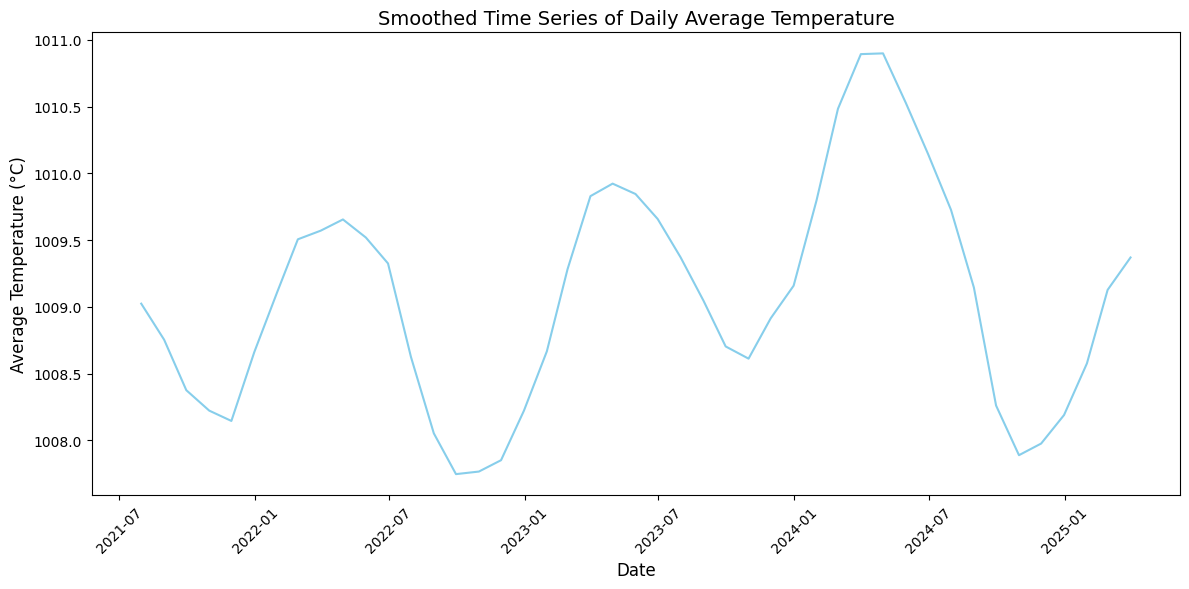

In [ ]:
# Đặt tần suất xuống 1 ngày và tính trung bình nhiệt độ mỗi ngày
temperature_daily = dataset.resample('M', on='datetime')['pressure'].mean()

# Áp dụng trung bình động với cửa sổ 7 ngày để làm mượt dữ liệu
temperature_smoothed = temperature_daily.rolling(window=7).mean()

# Vẽ biểu đồ với dữ liệu đã làm mượt
plt.figure(figsize=(12, 6))
plt.plot(temperature_smoothed, color='skyblue')
plt.title('Smoothed Time Series of Daily Average Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_478638/1146301649.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


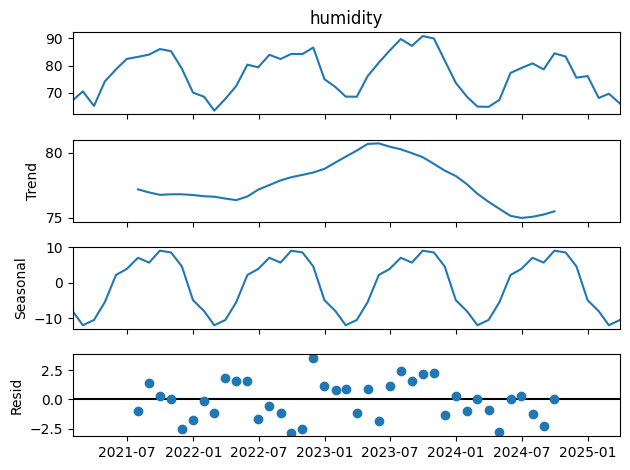

In [ ]:

# Tạo một series thời gian theo ngày để phân tích
# temperature_daily = dataset.groupby('date')['temp'].max()
# temperature_daily = dataset.groupby('date')['temp'].min()
temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


# Decompose dữ liệu thành các yếu tố: trend, seasonal, residual
decomposition = seasonal_decompose(temperature_daily, model='additive', period=12)  # Period = 365 cho năm
decomposition.plot()
plt.tight_layout()
plt.show()


---
Xây dựng mô hình 

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Kiểm tra tính dừng của chuỗi thời gian (temperature_daily)
temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()
result = adfuller(temperature_daily.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Nếu p-value nhỏ hơn 0.05, chuỗi đã dừng


ADF Statistic: -5.661669402447262
p-value: 9.349267605132403e-07


/tmp/ipykernel_478638/214957668.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  temperature_daily = dataset.resample('M', on='datetime')['humidity'].mean()


In [ ]:
train_data = dataset[dataset['datetime'] < '2025-01-01']  # Dữ liệu trước năm 2024
test_data = dataset[dataset['datetime'] >= '2025-01-01']  # Dữ liệu từ đầu năm 2025

train_series = train_data.resample('D', on='datetime')['temp'].mean()
test_series = test_data.resample('D', on='datetime')['temp'].mean()
# test_data


/tmp/ipykernel_478638/139105580.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  train_series = train_data.resample('M', on='datetime')['temp'].mean()  # Resample theo tháng
/tmp/ipykernel_478638/139105580.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  test_series = test_data.resample('M', on='datetime')['temp'].mean()  # Resample theo tháng
/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29927D-01    |proj g|=  3.55732D-01

At iterate    5    f=  7.53774D-01    |proj g|=  2.49440D-02

At iterate   10    f=  7.35090D-01    |proj g|=  2.27084D-02

At iterate   15    f=  7.28258D-01    |proj g|=  9.06991D-03

At iterate   20    f=  7.26876D-01    |proj g|=  4.02121D-03

At iterate   25    f=  7.26760D-01    |proj g|=  1.66101D-03

At iterate   30    f=  7.26611D-01    |proj g|=  6.84783D-03

At iterate   35    f=  7.26524D-01    |proj g|=  2.99796D-03

At iterate   40    f=  7.26507D-01    |proj g|=  1.60436D-03

At iterate   45    f=  7.26503D-01    |proj g|=  5.53049D-04

At iterate   50    f=  7.26501D-01    |proj g|=  2.80987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/nguyennn263/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


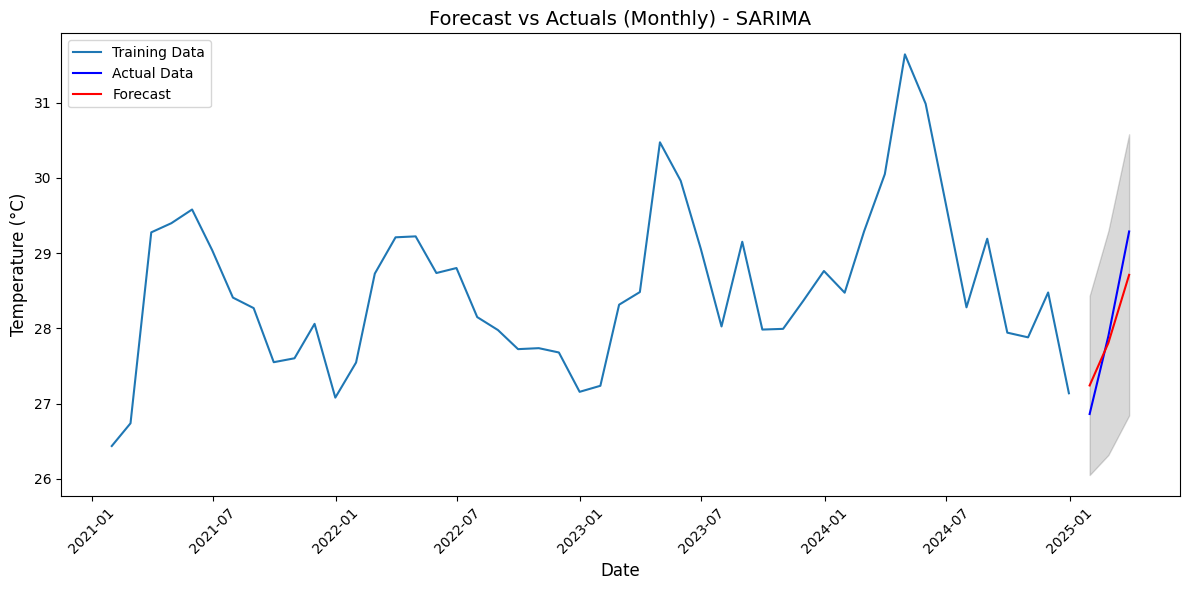

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Chia dữ liệu thành train và test
train_data = dataset[dataset['datetime'] < '2025-01-01']  # Dữ liệu trước năm 2024
test_data = dataset[dataset['datetime'] >= '2025-01-01']  # Dữ liệu từ đầu năm 2025

# Tạo series thời gian nhiệt độ trung bình theo tháng cho dữ liệu huấn luyện và kiểm tra
train_series = train_data.resample('M', on='datetime')['temp'].mean()  # Resample theo tháng
test_series = test_data.resample('M', on='datetime')['temp'].mean()  # Resample theo tháng

# Xây dựng mô hình SARIMA (p, d, q) cho AR, differencing, MA và (P, D, Q, s) cho mùa vụ
# P, D, Q, s là các tham số cho mùa vụ, trong đó s = 12 là chu kỳ hàng năm cho dữ liệu tháng
model = SARIMAX(train_series, order=(3, 2, 1), seasonal_order=(1, 1, 1, 12))
fitted = model.fit()

# Dự báo 90 tháng tiếp theo (tương ứng với 90 tháng trong tương lai)
fc = fitted.forecast(steps=90)

# Lấy khoảng tin cậy (confidence intervals) cho dự báo
conf_int = fitted.get_forecast(steps=90).conf_int(alpha=0.05)

# Chuyển kết quả dự báo thành pandas series
fc_series = pd.Series(fc, index=test_series.index[:90])
lower_series = pd.Series(conf_int.iloc[:, 0], index=test_series.index[:90])
upper_series = pd.Series(conf_int.iloc[:, 1], index=test_series.index[:90])

# Vẽ đồ thị so sánh dữ liệu thực tế và dự báo
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Actual Data', color='blue')
plt.plot(fc_series, label='Forecast', color='red')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title('Forecast vs Actuals (Monthly) - SARIMA', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cách làm tương tự với 3 feature còn lại

---
Đối với chất lượng không khí aqi

<Axes: >

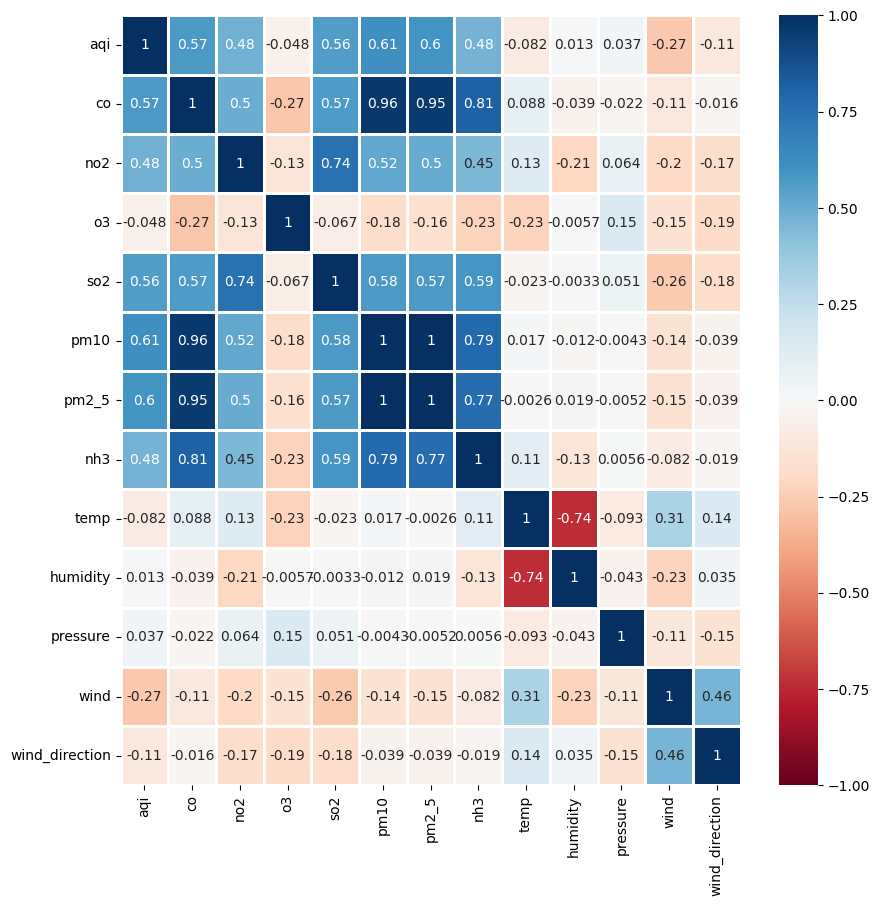

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))

corr_matrix = dataset[cols].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'RdBu', linewidths = 0.9, vmin = -1, vmax = 1)
     

In [ ]:
cols = ['aqi', 'co', 'no2', 'o3', 'so2', 'pm10', 'pm2_5', 'nh3', 'temp', 'humidity', 'pressure', 'wind', 'wind_direction']

corr_matrix = dataset[cols].corr()
target_feature = 'aqi'
correlations = corr_matrix[target_feature].abs().sort_values(ascending = False)
print(f"Correlation score:")
print(correlations[1:])

Correlation score:
pm10              0.613918
pm2_5             0.600069
co                0.573488
so2               0.556137
no2               0.483460
nh3               0.475341
wind              0.269075
wind_direction    0.107287
temp              0.081518
o3                0.047543
pressure          0.037235
humidity          0.013486
Name: aqi, dtype: float64


Hầu hết các chỉ số không khí có độ tương quan cao với chỉ số aqi. 

Chỉ có duy nhất Gió có độ tương quan cao (wind): Tốc độ có thể ảnh hưởng đến sự phân tán của các chất ô nhiễm.


Do đó ta chỉ lấy các feature có độ tương quan > 0.2


In [ ]:
from sklearn.model_selection import train_test_split
# creat col_name pm10 pm2_5 co so2 no2 nh3 ,wind  

selected_features = ['pm10', 'pm2_5', 'co', 'so2', 'no2', 'nh3', 'wind']

X = dataset[selected_features]  # Các đặc trưng
y = dataset['aqi'] -1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Sử dụng Logistic Regression cho phân loại
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.51      0.60       209
           1       0.78      0.83      0.81      1730
           2       0.44      0.40      0.42      1234
           3       0.48      0.44      0.46      1541
           4       0.83      0.91      0.87      2611

    accuracy                           0.69      7325
   macro avg       0.65      0.62      0.63      7325
weighted avg       0.68      0.69      0.68      7325

Confusion Matrix:
 [[ 106  103    0    0    0]
 [  39 1437  200   54    0]
 [   2  227  491  443   71]
 [   0   68  398  678  397]
 [   0    0   20  228 2363]]


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Sử dụng Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       209
           1       0.91      0.94      0.92      1730
           2       0.62      0.58      0.60      1234
           3       0.66      0.63      0.64      1541
           4       0.92      0.95      0.93      2611

    accuracy                           0.82      7325
   macro avg       0.81      0.81      0.81      7325
weighted avg       0.81      0.82      0.81      7325

Confusion Matrix:
 [[ 199   10    0    0    0]
 [   9 1622   99    0    0]
 [   0  143  714  377    0]
 [   0    4  337  971  229]
 [   0    0    0  134 2477]]


In [ ]:
from sklearn.neural_network import MLPClassifier


# Khởi tạo mô hình MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Huấn luyện mô hình MLP
mlp_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_mlp = mlp_model.predict(X_test)

# Đánh giá mô hình
print("MLP - Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP - Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82       209
           1       0.87      0.90      0.88      1730
           2       0.45      0.78      0.57      1234
           3       0.66      0.06      0.11      1541
           4       0.85      0.97      0.91      2611

    accuracy                           0.73      7325
   macro avg       0.71      0.73      0.66      7325
weighted avg       0.74      0.73      0.68      7325

Confusion Matrix:
 [[ 192   17    0    0    0]
 [  68 1555  107    0    0]
 [   1  210  965   36   22]
 [   0   13  995   97  436]
 [   0    0   57   14 2540]]


In [ ]:
import xgboost as xgb
# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       209
           1       0.91      0.93      0.92      1730
           2       0.60      0.56      0.58      1234
           3       0.64      0.63      0.63      1541
           4       0.92      0.94      0.93      2611

    accuracy                           0.81      7325
   macro avg       0.81      0.81      0.81      7325
weighted avg       0.80      0.81      0.81      7325



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sử dụng AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost - Classification Report:\n", classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


/home/nguyennn263/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       209
           1       0.83      0.96      0.89      1730
           2       0.60      0.02      0.05      1234
           3       0.49      0.03      0.06      1541
           4       0.53      1.00      0.69      2611

    accuracy                           0.62      7325
   macro avg       0.64      0.60      0.51      7325
weighted avg       0.61      0.62      0.50      7325

Confusion Matrix:
 [[ 206    3    0    0    0]
 [  62 1663    5    0    0]
 [   3  310   29   53  839]
 [   0   15   14   50 1462]
 [   0    1    0    0 2610]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sử dụng Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       209
           1       0.89      0.94      0.92      1730
           2       0.58      0.51      0.54      1234
           3       0.63      0.60      0.62      1541
           4       0.91      0.96      0.93      2611

    accuracy                           0.80      7325
   macro avg       0.79      0.79      0.79      7325
weighted avg       0.79      0.80      0.80      7325

Confusion Matrix:
 [[ 198   11    0    0    0]
 [  10 1631   89    0    0]
 [   0  186  627  421    0]
 [   0    4  361  923  253]
 [   0    0    1  115 2495]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Sử dụng Naive Bayes (GaussianNB cho dữ liệu liên tục)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.96      0.72       209
           1       0.81      0.84      0.82      1730
           2       0.43      0.52      0.47      1234
           3       0.43      0.45      0.44      1541
           4       0.95      0.76      0.85      2611

    accuracy                           0.68      7325
   macro avg       0.64      0.71      0.66      7325
weighted avg       0.71      0.68      0.69      7325

Confusion Matrix:
 [[ 201    8    0    0    0]
 [ 138 1457  134    1    0]
 [   7  289  644  290    4]
 [   0   49  711  691   90]
 [   0    1    8  618 1984]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Sử dụng k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Dự báo và đánh giá mô hình
y_pred_knn = knn_model.predict(X_test)
print("k-NN - Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


k-NN - Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       209
           1       0.84      0.90      0.87      1730
           2       0.47      0.45      0.46      1234
           3       0.54      0.50      0.52      1541
           4       0.90      0.91      0.91      2611

    accuracy                           0.74      7325
   macro avg       0.71      0.71      0.71      7325
weighted avg       0.74      0.74      0.74      7325

Confusion Matrix:
 [[ 168   41    0    0    0]
 [  37 1556  123   14    0]
 [   1  227  558  439    9]
 [   0   32  482  778  249]
 [   0    0   18  215 2378]]
